# Working with Data

## Describing Data using Pandas
In this first section, we will use the Pandas package to explore and describe data from [O'Connell, K., Berluti, K., Rhoads, S. A., & Marsh, A. A. (2021). Reduced social distancing during the COVID-19 pandemic is associated with antisocial behaviors in an online United States sample. PLoS ONE.](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244974)

This study assessed whether social distancing behaviors (early in the COVID-19 pandemic) was associated with self-reported antisocial behavior.

In [10]:
# Remember: Python requires you to explictly "import" libraries before their functions are available to use. We will always specify our imports at the beginning of each notebook.
import pandas as pd, numpy as np

Here, we will load a dataset as a `pandas.DataFrame`, and investigate its attributes. We will see `N` rows for each subject, and `M` columns for each variable.

### Loading data

In [37]:
# string with location of file
filename = 'static/data/OConnell_COVID_MTurk_noPII_post_peerreview.csv'

# load data specified in `filename` into dataframe `df`
df = pd.read_csv(filename)

In [4]:
# check type of df
type(df)

pandas.core.frame.DataFrame

In [6]:
# how many rows and columns are in df?
print(df.values.shape) # N x M

(131, 126)


Looks like we will have 131 rows (usually subjects, but can be multiple observations per subject) and 126 columns (usually variables)

In [9]:
# Let's output the first 5 rows of the df
print(df.head())

   subID  mturk_randID  suspect_itaysisso        Country Region  \
0   1001          8797                  0  United States     CT   
1   1002          3756                  0  United States     IL   
2   1003          3798                  0  United States     OH   
3   1004          2965                  0  United States     TX   
4   1005          5953                  0  United States     NC   

                                        ISP loc_US       loc_state  \
0  AS7015 Comcast Cable Communications, LLC    Yes     Connecticut   
1                AS7018 AT&T Services, Inc.    Yes      California   
2        AS10796 Charter Communications Inc    Yes            Ohio   
3                AS7018 AT&T Services, Inc.    Yes           Texas   
4            AS20115 Charter Communications    Yes  North Carolina   

   loc_zipcode          loc_County  ...  education_4yr  STAB_total_centered  \
0         6511    New Haven County  ...              0            -3.946565   
1        90280  Lo

<hr>

### Creating custom DataFrames

We can also create our own dataframe. For example, here's a dataframe containing 20 rows and 3 columns of random numbers.

In [23]:
sim_df = pd.DataFrame(np.random.randn(20, 3), index=range(0,20), columns=["column A", "column B", "column C"])
print(sim_df)

    column A  column B  column C
0  -1.388322 -1.890195 -1.016592
1   1.224311  1.515893 -0.557915
2   0.491926 -0.003718 -0.360766
3  -0.688348 -1.446706  0.031946
4   0.890278 -0.542155  1.027715
5  -0.618259 -0.309817 -1.858507
6   0.005811 -1.950119  0.212660
7  -0.895792  0.006619  1.213759
8  -0.116664 -1.099549  0.692121
9   1.046153  1.046245  0.315935
10 -0.575062 -0.562702  0.077496
11  0.222220  0.074048  1.879737
12  0.182451 -0.154743  0.012731
13  0.615812 -0.742780 -0.986867
14  0.454206  0.124554  0.616438
15  0.251272  0.009873 -1.750404
16 -0.623671 -0.277500 -0.940963
17 -0.004741  1.291071 -0.056100
18  0.484304 -0.297734  0.068421
19 -1.631485  0.866963  2.460131


We can change the column names using list comprehension

In [22]:
# e.g., change to upper case
sim_df.columns = [x.upper() for x in sim_df.columns]
print(sim_df.head()) #display first 5 rows

   COLUMN A  COLUMN B  COLUMN C
0  0.692425  0.485331 -1.616688
1 -0.125338 -0.674775  1.363204
2  1.032742 -0.582277  1.082185
3  1.680781  1.157461 -1.829494
4 -1.450813 -0.893101 -0.389002


In [25]:
# e.g., change to last element in string
sim_df.columns = [x[-1] for x in sim_df.columns]
print(sim_df.tail()) #display last 5 rows

           A         B         C
15  0.251272  0.009873 -1.750404
16 -0.623671 -0.277500 -0.940963
17 -0.004741  1.291071 -0.056100
18  0.484304 -0.297734  0.068421
19 -1.631485  0.866963  2.460131


<hr>

### Concatenating DataFrames

We can **concatenate** multiple dataframes containing the same columns (e.g., ['A','B','C']) using [pd.concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html). This will stack rows across dataframes.

Usage:
```
pd.concat(
    objs,
    axis=0,
    join="outer",
    ignore_index=False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)
```

In [67]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [68]:
# create two new dataframes 

# the first will contain only zeros 
sim_df1 = pd.DataFrame(np.zeros((3, 3)), index=[20,21,22], columns=["A", "B", "C"])

# the second will contain only ones
sim_df2 = pd.DataFrame(np.ones((3, 3)), index=[23,24,25], columns=["A", "B", "C"])


In [69]:
sim_dfs = [sim_df, sim_df1, sim_df2] # as list of dfs
result = pd.concat(sim_dfs)
print(result)

           A         B         C
0  -1.388322 -1.890195 -1.016592
1   1.224311  1.515893 -0.557915
2   0.491926 -0.003718 -0.360766
3  -0.688348 -1.446706  0.031946
4   0.890278 -0.542155  1.027715
5  -0.618259 -0.309817 -1.858507
6   0.005811 -1.950119  0.212660
7  -0.895792  0.006619  1.213759
8  -0.116664 -1.099549  0.692121
9   1.046153  1.046245  0.315935
10 -0.575062 -0.562702  0.077496
11  0.222220  0.074048  1.879737
12  0.182451 -0.154743  0.012731
13  0.615812 -0.742780 -0.986867
14  0.454206  0.124554  0.616438
15  0.251272  0.009873 -1.750404
16 -0.623671 -0.277500 -0.940963
17 -0.004741  1.291071 -0.056100
18  0.484304 -0.297734  0.068421
19 -1.631485  0.866963  2.460131
20  0.000000  0.000000  0.000000
21  0.000000  0.000000  0.000000
22  0.000000  0.000000  0.000000
23  1.000000  1.000000  1.000000
24  1.000000  1.000000  1.000000
25  1.000000  1.000000  1.000000


We can also concatenate using the rows (setting `axis=1`)

In [72]:
# the first will contain only zeros 
sim_df3 = pd.DataFrame(np.zeros((3, 3)), index=[1,2,3], columns=["A", "B", "C"])

# the second will contain only ones
sim_df4 = pd.DataFrame(np.ones((3, 3)), index=[2,4,5], columns=["D", "E", "F"])

result2 = pd.concat([sim_df3, sim_df4], axis=1)
print(result2)

     A    B    C    D    E    F
1  0.0  0.0  0.0  NaN  NaN  NaN
2  0.0  0.0  0.0  1.0  1.0  1.0
3  0.0  0.0  0.0  NaN  NaN  NaN
4  NaN  NaN  NaN  1.0  1.0  1.0
5  NaN  NaN  NaN  1.0  1.0  1.0


Notice that we have NaNs (not a number) in cells where there were no data (for example, no data in column `D` for index `1`)

We have to be careful because all elements will not merge across rows and columns by default. For example, if the second df also had a column "C", we will have two "C" columns by default.

In [73]:
# the first will contain only zeros 
sim_df5 = pd.DataFrame(np.zeros((3, 3)), index=[1,2,3], columns=["A", "B", "C"])

# the second will contain only ones
sim_df6 = pd.DataFrame(np.ones((3, 4)), index=[2,4,5], columns=["C", "D", "E", "F"])

result3a = pd.concat([sim_df5, sim_df6], axis=1)
print(result3a)

     A    B    C    C    D    E    F
1  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  1.0  1.0  1.0  1.0
5  NaN  NaN  NaN  1.0  1.0  1.0  1.0


By default, this method takes the "union" of dataframes. This is useful because it means no information will be lost!

But, now we have two columns named "C". To fix, this we can have pandas rename columns with matching names using the `DataFrame.merge()` method.

In [105]:
result3b = sim_df5.merge(sim_df6, how='outer', left_index=True, right_index=True)
print(result3b)

     A    B  C_x  C_y    D    E    F
1  0.0  0.0  0.0  NaN  NaN  NaN  NaN
2  0.0  0.0  0.0  1.0  1.0  1.0  1.0
3  0.0  0.0  0.0  NaN  NaN  NaN  NaN
4  NaN  NaN  NaN  1.0  1.0  1.0  1.0
5  NaN  NaN  NaN  1.0  1.0  1.0  1.0


We could also take the "intersection" across the two dataframes. We can do that by setting `join='inner'` (Meaning we only keep the rows that are shared between the two). In the previous case, this would be row '2'. All columns would be retained.

In [106]:
result3c = pd.concat([sim_df5, sim_df6], axis=1, join='inner')
print(result3c)

     A    B    C    C    D    E    F
2  0.0  0.0  0.0  1.0  1.0  1.0  1.0


<hr>

### Manipulating DataFrames

We can also change values within the dataframe using list comprehension.

In [32]:
# first let's view the column "subID"
df['subID']

0      1001
1      1002
2      1003
3      1004
4      1005
       ... 
126    1160
127    1161
128    1162
129    1163
130    1164
Name: subID, Length: 131, dtype: int64

In [39]:
# now, let's change these value by adding a prefix 'sub_' and store in a new column called "subID_2"
df['subID_2'] = ['sub_'+str(x) for x in df['subID']]

In [40]:
df['subID_2']

0      sub_1001
1      sub_1002
2      sub_1003
3      sub_1004
4      sub_1005
         ...   
126    sub_1160
127    sub_1161
128    sub_1162
129    sub_1163
130    sub_1164
Name: subID_2, Length: 131, dtype: object

We can also grab specific elements in the dataframe by specifying rows and columns

In [49]:
print(df['age'][df['subID']==1001])

0    21
Name: age, dtype: int64


In [53]:
# if you know the index (row name), then you can use the `pd.DataFrame.loc` method
df.loc[0,'age']

21

Creating new columns is particularly useful for computing new variables from old variables. For example: for each subject, let's multiply `age` by `stab_total`.

In [57]:
for index,subject in enumerate(df['subID']):
    df.loc[index,'new_col'] = df.loc[index,'age'] * df.loc[index,'STAB_total'] 

We can extract a column of observations to a numpy array

In [41]:
sub_ids = df['subID'].values

In [42]:
print(sub_ids)

[1001 1002 1003 1004 1005 1007 1011 1013 1014 1015 1016 1017 1021 1022
 1023 1024 1026 1028 1029 1032 1033 1034 1035 1040 1043 1044 1045 1047
 1048 1049 1051 1053 1054 1056 1057 1058 1059 1060 1061 1062 1063 1064
 1066 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080
 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095
 1096 1098 1099 1100 1101 1102 1104 1105 1107 1108 1109 1110 1111 1112
 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126
 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138 1139 1141
 1144 1145 1146 1147 1148 1149 1150 1151 1152 1154 1155 1156 1157 1158
 1160 1161 1162 1163 1164]


In [28]:
print(type(sub_ids))

<class 'numpy.ndarray'>


We can also transpose the dataframe

In [61]:
print(df.T.head())

                             0              1              2              3    \
subID                       1001           1002           1003           1004   
mturk_randID                8797           3756           3798           2965   
suspect_itaysisso              0              0              0              0   
Country            United States  United States  United States  United States   
Region                        CT             IL             OH             TX   

                             4              5              6              7    \
subID                       1005           1007           1011           1013   
mturk_randID                5953           8133           2500           7655   
suspect_itaysisso              0              0              0              0   
Country            United States  United States  United States  United States   
Region                        NC             MA             FL             WI   

                          

### Statistics with DataFrames

We can compute all sorts of descriptive statistics on DataFrame columns using the following methods:
- `count()`: Number of non-null observations
- `sum()`: Sum of values
- `mean()`: Mean of Values
- `median()`: Median of Values
- `mode()`: Mode of values
- `std()`: Standard Deviation of the Values
- `min()`: Minimum Value
- `max()`: Maximum Value
- `abs()`: Absolute Value
- `prod()`: Product of Values
- `cumsum()`: Cumulative Sum
- `cumprod()`: Cumulative Product

Here are some examples:

In [107]:
# mean of a column
df["age"].mean()

36.33587786259542

In [121]:
# mean of multiple columns
df[["age","STAB_total"]].mean()

age           36.335878
STAB_total    54.946565
dtype: float64

In [111]:
# median of a column
df["age"].median()

34.0

In [112]:
# compute a summary of metrics on columns
df[["age", "STAB_total"]].describe()

,age,STAB_total
count,131.000000,131.000000
mean,36.335878,54.946565
std,10.075569,30.095569
min,21.000000,32.000000
25%,29.500000,35.000000
50%,34.000000,42.000000
75%,41.000000,55.500000
max,65.000000,139.000000


In [117]:
# group means by sex
df.groupby("sex")[["age", "STAB_total"]].mean()

,age,STAB_total
sex,,
Female,38.264151,49.792453
Male,35.025641,58.448718


In [118]:
# group means by sex and education
df.groupby(["sex","education_coded"])[["age", "STAB_total"]].mean()

age  \
sex    education_coded                                                 
Female Four-year college degree (B.A., B.S.)               37.592593   
       High school graduate or G.E.D.                      42.400000   
       Master's degree (for example, M.B.A., M.A., M.S.)   38.200000   
       Some college                                        38.875000   
       Two-year college degree (A.A., A.S.)                37.375000   
Male   Doctoral or professional degree (for example, P...  31.500000   
       Four-year college degree (B.A., B.S.)               35.125000   
       High school graduate or G.E.D.                      31.777778   
       Master's degree (for example, M.B.A., M.A., M.S.)   39.000000   
       Some college                                        34.368421   
       Two-year college degree (A.A., A.S.)                36.750000   

                                                           STAB_total  
sex    education_coded                                                 
Female Four-year college degree (B.A., B.S.)                54.074074  
       High school graduate or G.E.D.                       37.600000  
       Master's degree (for example, M.B.A., M.A., M.S.)    55.800000  
       Some college                                         48.875000  
       Two-year college degree (A.A., A.S.)                 40.125000  
Male   Doctoral or professional degree (for example, P...   34.500000  
       Four-year college degree (B.A., B.S.)                64.000000  
       High school graduate or G.E.D.                       63.888889  
       Master's degree (for example, M.B.A., M.A., M.S.)    77.375000  
       Some college                                         48.157895  
       Two-year college degree (A.A., A.S.)                 41.625000

In [119]:
# group counts by sex and education
df.groupby(["sex","education_coded"])[["age", "STAB_total"]].count()

age  STAB_total
sex    education_coded                                                    
Female Four-year college degree (B.A., B.S.)                27          27
       High school graduate or G.E.D.                        5           5
       Master's degree (for example, M.B.A., M.A., M.S.)     5           5
       Some college                                          8           8
       Two-year college degree (A.A., A.S.)                  8           8
Male   Doctoral or professional degree (for example, P...    2           2
       Four-year college degree (B.A., B.S.)                32          32
       High school graduate or G.E.D.                        9           9
       Master's degree (for example, M.B.A., M.A., M.S.)     8           8
       Some college                                         19          19
       Two-year college degree (A.A., A.S.)                  8           8

We can also correlate 2 or more variables

In [130]:
df[["age","STAB_total","socialdistancing"]].corr(method="spearman")

,age,STAB_total,socialdistancing
age,1.000000,-0.145465,0.007075
STAB_total,-0.145465,1.000000,-0.335639
socialdistancing,0.007075,-0.335639,1.000000


## Visualizing Data using Matplotlib

To understand what our data look like, we will visualize it in different ways.

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

Let's plot the distribiton of one variable in our data

Text(0, 0.5, 'Number of Subjects')

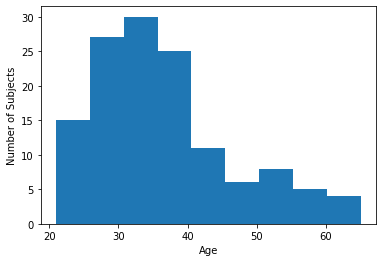

In [138]:
plt.hist(df['age'], bins=9)
plt.xlabel("Age")
plt.ylabel("Number of Subjects")

Let's see what percentage of subjects have a below-average score:

In [139]:
mean_age = np.mean(df['age'])
frac_below_mean = (df['age'] < mean_age).mean()
print(f"{frac_below_mean:2.1%} of subjects are below the mean")

63.4% of subjects are below the mean


We can also see this by adding the average score to the histogram plot:


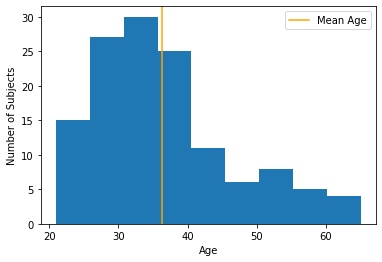

In [140]:
plt.hist(df['age'], bins=9)
plt.xlabel("Age")
plt.ylabel("Number of Subjects")

plt.axvline(mean_age, color="orange", label="Mean Age")
plt.legend()

Comparing mean and median

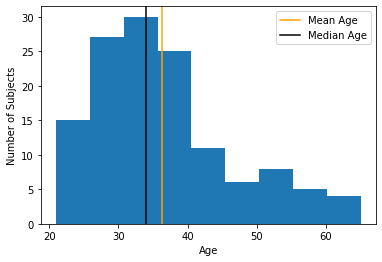

In [143]:
med_age = np.median(df['age'])

plt.hist(df['age'], bins=9)
plt.xlabel("Age")
plt.ylabel("Number of Subjects")

plt.axvline(mean_age, color="orange", label="Mean Age")
plt.axvline(med_age, color="black", label="Median Age")

plt.legend()